In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
%matplotlib inline

#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_X_y

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler  # балансировка классов
from imblearn.pipeline import Pipeline # используем из-за чуждой балансировки

from collections import Counter

import seaborn as sns

import pickle

from ftplib import FTP  

### Начало!!

#### При подготовке в продакт, сделать принудительный путь через os.path?

In [2]:
#df = pd.read_csv('post_07_10_2020_1.csv', sep=';')
df = pd.read_csv('Ispytat_28_01_2021_1_year.csv', sep=';')

In [3]:
df

НомерСтроки    Артикул  КодХарактеристики  \
0                1   612807.0                NaN   
1                2        NaN                NaN   
2                3   167002.0                NaN   
3                4   167010.0                NaN   
4                5   167012.0                NaN   
...            ...        ...                ...   
51181        51182  7708952.0                NaN   
51182        51183   424199.0                NaN   
51183        51184  7724860.0                8.0   
51184        51185   501484.0                NaN   
51185        51186  7700029.0                1.0   

                                      ГруппаНоменклатуры  \
0      <Объект не найден> (71:a2f0002590e2e24b11eb50b...   
1                                                    NaN   
2                                          ООО "Арт-Пак"   
3                                          ООО "Арт-Пак"   
4                                          ООО "Арт-Пак"   
...                                                  ...   
51181                  яДеревянные декоративные элементы   
51182                                 яЛатексная резинка   
51183                                 яТесьма отделочная   
51184                           яТкани в лоскутах разные   
51185                 яКлипсы, подхваты магнитные разные   

                                            Номенклатура ЕдиницаИзмерения  \
0       1178 Набор для творчества Велюрики "Совушка"11см               шт   
1                                                    xxx               шт   
2                GL35 Вешалка пластиковая, черная, 35 см               шт   
3                 R42 Вешалка пластиковая, черная, 42 см               шт   
4                 V42 Вешалка пластиковая, черная, 42 см               шт   
...                                                  ...              ...   
51181                    Шишки декоративные YW150, 250гр             упак   
51182              26-07005/15 Резинка латексная бел. ГР               кг   
51183            7165 Тесьма отделочная 1,6 см*27,42м ДУ                м   
51184  23646 Ткань "ДЕКОР 7/12" с принтом 50*50см (60...               шт   
51185               Подхват шторный на магнитах  FCG1082              пар   

      БазоваяЕдиницаИзмеренияАйриса  ОптоваяФасовкаАйрис  КоэффициентЕдиницы  \
0                                шт                 1.00                 1.0   
1                               NaN                 1.00                 1.0   
2                                шт               300.00                 1.0   
3                                шт               150.00                 1.0   
4                                шт               100.00                 1.0   
...                             ...                  ...                 ...   
51181                          упак                 1.00                 1.0   
51182                            кг                 7.00                 1.0   
51183                             м                27.42                 1.0   
51184                            шт                 1.00                 1.0   
51185                           пар                 1.00                 1.0   

       СредниеПродажи  ...  КоличествоДнейНаСкладе  ЗакупкаЗаПериод  \
0               0.000  ...                      50             12.0   
1               0.000  ...                       0              0.0   
2               0.000  ...                       0              0.0   
3               0.000  ...                       0            150.0   
4               0.000  ...                       0            100.0   
...               ...  ...                     ...              ...   
51181           0.000  ...                       0              0.0   
51182           0.000  ...                       0              0.0   
51183           0.163  ...                     366              0.0   
51184           0.000  ...                       0              1

In [305]:
df[df['Артикул']==415019] # быстрая оценка значений классов:

НомерСтроки   Артикул  КодХарактеристики ГруппаНоменклатуры  \
870          871  415019.0               22.0    Этикетки разные   
871          872  415019.0               23.0    Этикетки разные   
872          873  415019.0               24.0    Этикетки разные   
873          874  415019.0               25.0    Этикетки разные   
874          875  415019.0               26.0    Этикетки разные   
875          876  415019.0               46.0    Этикетки разные   
876          877  415019.0               27.0    Этикетки разные   
877          878  415019.0               28.0    Этикетки разные   
878          879  415019.0               29.0    Этикетки разные   
879          880  415019.0               30.0    Этикетки разные   
880          881  415019.0               31.0    Этикетки разные   
881          882  415019.0               32.0    Этикетки разные   
882          883  415019.0               33.0    Этикетки разные   
883          884  415019.0               34.0    Этикетки разные   
884          885  415019.0               35.0    Этикетки разные   
885          886  415019.0               36.0    Этикетки разные   
886          887  415019.0               37.0    Этикетки разные   
887          888  415019.0               38.0    Этикетки разные   
888          889  415019.0               39.0    Этикетки разные   
889          890  415019.0               50.0    Этикетки разные   
890          891  415019.0               54.0    Этикетки разные   
891          892  415019.0               55.0    Этикетки разные   
892          893  415019.0               40.0    Этикетки разные   
893          894  415019.0               41.0    Этикетки разные   
894          895  415019.0               42.0    Этикетки разные   
895          896  415019.0               43.0    Этикетки разные   
896          897  415019.0               48.0    Этикетки разные   
897          898  415019.0               47.0    Этикетки разные   
898          899  415019.0               49.0    Этикетки разные   
899          900  415019.0               44.0    Этикетки разные   

                                    Номенклатура ЕдиницаИзмерения  \
870  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
871  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
872  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
873  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
874  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
875  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
876  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
877  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
878  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
879  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
880  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
881  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
882  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
883  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
884  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
885  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
886  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
887  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
888  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
889  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
890  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
891  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
892  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
893  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
894  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
895  Этикетка 10*20мм. NWA бел.  100шт. (размер)             упак   
896  Этикетка 10*20мм. NWA бел.  

In [5]:
df['КоэффициентЕдиницы'].unique()

array([  1.  ,   4.  , 100.  ,  10.  ,  50.  ,   5.  ,  72.  ,  36.  ,
        25.  ,  20.  ,   3.  ,   2.  ,   8.  ,  15.  ,  12.  ,   6.  ,
       144.  ,  81.  ,   6.74])

In [253]:
df[df['ЗначениеТочкиЗаказа']==27.42] #быстрая оценка признаков

Empty DataFrame
Columns: [НомерСтроки, Артикул, КодХарактеристики, ГруппаНоменклатуры, Номенклатура, ЕдиницаИзмерения, ОптоваяФасовкаАйрис, КоэффициентЕдиницы, СредниеПродажи, Цена, ПроданоВсего, КоличествоСделок, КоличествоПериодовПродаж, КоличествоДнейНаСкладе, ЗакупкаЗаПериод, СтатусТовараАйриса, КатегорияТовара, КатегорияТовараАйриса, ЗакупочнаяЦена, МинимальныйСтраховойЗапас, ЗначениеТочкиЗаказа, ОсновнойПоставщик]
Index: []

[0 rows x 22 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51186 entries, 0 to 51185
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   НомерСтроки                             51186 non-null  int64  
 1   Артикул                                 51185 non-null  float64
 2   КодХарактеристики                       31209 non-null  float64
 3   ГруппаНоменклатуры                      51185 non-null  object 
 4   Номенклатура                            51186 non-null  object 
 5   ЕдиницаИзмерения                        51186 non-null  object 
 6   БазоваяЕдиницаИзмеренияАйриса           51103 non-null  object 
 7   ОптоваяФасовкаАйрис                     51186 non-null  float64
 8   КоэффициентЕдиницы                      51186 non-null  float64
 9   СредниеПродажи                          51186 non-null  float64
 10  Цена                                    51186 non-null  fl

#### Начинаем работу со строками:

In [8]:
df.drop(['КоэффициентМинимальнойПоставкиИзлишков',
         'БазоваяЕдиницаИзмеренияАйриса'], axis=1, inplace=True)

In [9]:
df.dropna(subset=['Артикул', 'СтатусТовараАйриса', 'ЕдиницаИзмерения', 'ОптоваяФасовкаАйрис', 
                  'КоэффициентЕдиницы', 'Цена', 'ЗакупочнаяЦена', 'ОсновнойПоставщик'], inplace=True) # подумать насчет СтатусТовараАйриса

In [10]:
ind_for_drop = df[(df['СредниеПродажи'].isna() & df['КоличествоСделок'] > 0)
                  | (df['ЗакупкаЗаПериод'] < 0) | (df['ПроданоВсего'] < 0)
                  | (df['СтатусТовараАйриса'] == 'Исключенный')].index
df_1 = df.drop(list(ind_for_drop))  #### удалить строчки, в ктр средние продажи = 0, а кол-во сделок> 0 и т.д.

In [11]:
df_1[['КодХарактеристики', 'Артикул']] = df_1[['КодХарактеристики', 'Артикул']].astype(dtype='Int32')

In [12]:
df_1.loc[df['МинимальныйСтраховойЗапас'] < 1, 'МинимальныйСтраховойЗапас'] = 0.001 # приводим все мин ктр меньше 1 к одному числу

In [13]:
len(list(ind_for_drop))

1785

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49347 entries, 0 to 51185
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   НомерСтроки                49347 non-null  int64  
 1   Артикул                    49347 non-null  Int32  
 2   КодХарактеристики          30002 non-null  Int32  
 3   ГруппаНоменклатуры         49347 non-null  object 
 4   Номенклатура               49347 non-null  object 
 5   ЕдиницаИзмерения           49347 non-null  object 
 6   ОптоваяФасовкаАйрис        49347 non-null  float64
 7   КоэффициентЕдиницы         49347 non-null  float64
 8   СредниеПродажи             49347 non-null  float64
 9   Цена                       49347 non-null  float64
 10  ПроданоВсего               49347 non-null  float64
 11  КоличествоСделок           49347 non-null  int64  
 12  КоличествоПериодовПродаж   49347 non-null  int64  
 13  КоличествоДнейНаСкладе     49347 non-null  int

In [15]:
df_1.describe(include='object')

ГруппаНоменклатуры       Номенклатура ЕдиницаИзмерения  \
count               49347              49347            49347   
unique               1032              26111               62   
top                 Астра  Бисер Preciosa 5г               шт   
freq                 1594                460            28140   

       СтатусТовараАйриса КатегорияТовара КатегорияТовараАйриса  \
count               49347           36368                 32844   
unique                 18               4                     4   
top            Регулярный               C                     C   
freq                21076           14878                 17832   

       ОсновнойПоставщик  
count              49347  
unique               657  
top       ПРОТОС и К ООО  
freq                2417

In [16]:
df_1[['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа']].head(100)

МинимальныйСтраховойЗапас  ЗначениеТочкиЗаказа
0                        0.001                  0.0
2                        0.001                  0.0
3                        0.001                  0.0
4                        0.001                  0.0
5                        0.001                  0.0
..                         ...                  ...
97                       1.000                  2.0
98                       1.000                  2.0
99                       1.000                  2.0
100                      1.000                  2.0
101                      1.000                  2.0

[100 rows x 2 columns]

In [17]:
df_1.describe()

НомерСтроки       Артикул  КодХарактеристики  ОптоваяФасовкаАйрис  \
count  49347.000000  4.934700e+04       30002.000000         49347.000000   
mean   25622.974061  3.834963e+06          35.555163            16.145875   
std    14911.174159  1.735179e+07          77.668665            44.293181   
min        1.000000  1.230000e+03           1.000000             1.000000   
25%    12547.500000  4.986295e+05           2.000000             1.000000   
50%    25846.000000  6.611780e+05           6.000000             4.000000   
75%    38656.500000  7.715682e+06          23.000000            12.000000   
max    51186.000000  7.726618e+08         774.000000          1000.000000   

       КоэффициентЕдиницы  СредниеПродажи          Цена  ПроданоВсего  \
count        49347.000000    49347.000000  49347.000000  49347.000000   
mean             1.131563        0.844355    219.839607      8.978914   
std              2.666191        4.158172    506.155512     44.082630   
min              1.000000        0.000000      0.000000      0.000000   
25%              1.000000        0.000000     29.000000      0.000000   
50%              1.000000        0.079000    101.000000      1.000000   
75%              1.000000        0.605000    236.000000      6.122500   
max            144.000000      430.750000  19068.000000   3911.340000   

       КоличествоСделок  КоличествоПериодовПродаж  КоличествоДнейНаСкладе  \
count      49347.000000              49347.000000            49347.000000   
mean           3.928263                  1.988084              210.384036   
std           10.443877                  2.721347              165.622042   
min            0.000000                  0.000000                0.000000   
25%            0.000000                  0.000000                0.000000   
50%            1.000000                  1.000000              307.000000   
75%            4.000000                  3.000000              366.000000   
max          449.000000                 12.000000              366.000000   

       ЗакупкаЗаПериод  ЗакупочнаяЦена  МинимальныйСтраховойЗапас  \
count     49347.000000    49347.000000               49347.000000   
mean        139.237430      102.571595                   1.840141   
std         506.395733      363.216267                   3.459497   
min           0.000000        0.000000                   0.001000   
25%           6.000000       11.110000                   0.001000   
50%          33.000000       36.800000                   0.001000   
75%         123.000000       83.065000                   3.000000   
max       35041.000000    22500.000000                 100.000000   

       ЗначениеТочкиЗаказа  
count         49347.000000  
mean              9.535734  
std              25.677708  
min               0.000000  
25%               0.000000  
50%               2.000000  
75%              10.000000  
max            1000.000000

In [18]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49347 entries, 0 to 51185
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   НомерСтроки                49347 non-null  int64  
 1   Артикул                    49347 non-null  Int32  
 2   КодХарактеристики          30002 non-null  Int32  
 3   ГруппаНоменклатуры         49347 non-null  object 
 4   Номенклатура               49347 non-null  object 
 5   ЕдиницаИзмерения           49347 non-null  object 
 6   ОптоваяФасовкаАйрис        49347 non-null  float64
 7   КоэффициентЕдиницы         49347 non-null  float64
 8   СредниеПродажи             49347 non-null  float64
 9   Цена                       49347 non-null  float64
 10  ПроданоВсего               49347 non-null  float64
 11  КоличествоСделок           49347 non-null  int64  
 12  КоличествоПериодовПродаж   49347 non-null  int64  
 13  КоличествоДнейНаСкладе     49347 non-null  int

In [19]:
# Удаляем значения мин-макс по кол-ву менее 10!! (не будем на них обучаться!)
#df_1.groupby('ЗначениеТочкиЗаказа').nunique()

df_1['freq_z']=df.groupby(by='ЗначениеТочкиЗаказа')['ЗначениеТочкиЗаказа'].transform('count')
df_1['freq_s']=df.groupby(by='МинимальныйСтраховойЗапас')['МинимальныйСтраховойЗапас'].transform('count')

df_1 = df_1[(df_1['freq_z'] >= 10) & (df_1['freq_s'] >= 10)].drop(['freq_s', 'freq_z'],  axis=1)
#df_1.groupby(['Name','City']).filter(lambda x: sum(x['Age']) > 30)

In [20]:
X = df_1.drop(['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа'], axis=1)
y = df_1.loc[:, ['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа']]   # таргет

In [21]:
#y_need = y[df_1['МинимальныйСтраховойЗапас'].isna()] # отфильтровываем неизвестные значения МИН
#X_need = X.loc[list(y_need.index)] 

#y_filter = y.drop(list(y_need.index))      # формируем значения МИН и МАХа на ктр будем обучаться

#X_filter = X.drop(list(y_need.index))      # формируем соответствующие данные на ктр будем обучаться

In [22]:
y

МинимальныйСтраховойЗапас  ЗначениеТочкиЗаказа
0                          0.001                  0.0
2                          0.001                  0.0
3                          0.001                  0.0
4                          0.001                  0.0
5                          0.001                  0.0
...                          ...                  ...
51177                      3.000                  5.0
51179                      0.001                  0.0
51183                      0.001                  0.0
51184                      0.001                  0.0
51185                      0.001                  0.0

[49169 rows x 2 columns]

In [23]:
y_need = y[(y['ЗначениеТочкиЗаказа'] == 0)]  # убрал из выражения:y['МинимальныйСтраховойЗапас'] == 0) & ....
X_need = X.loc[list(y_need.index)]

y_filter = y.drop(list(y_need.index))      # формируем значения МИН и МАХа на ктр будем обучаться

X_filter = X.drop(list(y_need.index))      # формируем соответствующие данные на ктр будем обучаться

In [24]:
y_filter_min = y_filter['МинимальныйСтраховойЗапас']
y_filter_max = y_filter['ЗначениеТочкиЗаказа']

In [25]:
y_need.shape

(23219, 2)

In [26]:
X_filter


НомерСтроки  Артикул  КодХарактеристики             ГруппаНоменклатуры  \
9               10   502677               <NA>  Воротники декоративные, лейсы   
10              11   502962               <NA>  Воротники декоративные, лейсы   
11              12   502963               <NA>  Воротники декоративные, лейсы   
12              13   502964               <NA>  Воротники декоративные, лейсы   
13              14   506265               <NA>  Воротники декоративные, лейсы   
...            ...      ...                ...                            ...   
51172        51173  7700966                  1                          Цепи    
51173        51174  7700963                  2                          Цепи    
51174        51175  7700965                  2                          Цепи    
51175        51176  7700967                  1                          Цепи    
51177        51178   499320                  2                 яПряжа "ALIZE"   

                                            Номенклатура ЕдиницаИзмерения  \
9      2785901 Аппликации пришивные лейсы полиэстер 1...             упак   
10     2797325 Аппликации пришивные лейсы полиэстер 2...             упак   
11     2797327 Аппликации пришивные лейсы полиэстер 2...             упак   
12     2797329 Аппликации пришивные лейсы полиэстер 2...             упак   
13     3020259 Воротник пришивной,кружево, 24*23,5см ...               шт   
...                                                  ...              ...   
51172                  Цепь стальная 10,7*7,1*10м Y1611                 м   
51173                  Цепь стальная 5,4*3,8*10м Y21303                 м   
51174                    Цепь стальная 9,9*7,2*10м Y1830                м   
51175                         Цепь стальная BOX 3,5*10м                 м   
51177  Пряжа ALIZE "Country lux" 100гр., 32м. (20%шер...               шт   

       ОптоваяФасовкаАйрис  КоэффициентЕдиницы  СредниеПродажи   Цена  \
9                      1.0                 1.0           0.078   65.0   
10                     1.0                 1.0           0.684   93.0   
11                     1.0                 1.0           0.415   99.0   
12                     1.0                 1.0           0.672  118.0   
13                     1.0                 1.0           0.529   75.0   
...                    ...                 ...             ...    ...   
51172                 10.0                10.0           0.795  195.0   
51173                 10.0                10.0           0.000  120.0   
51174                 10.0                10.0           1.470  282.0   
51175                 10.0                10.0           0.271  437.0   
51177                  5.0                 1.0           0.333  260.0   

       ПроданоВсего  КоличествоСделок  КоличествоПериодовПродаж  \
9             1.000                 1                         1   
10            8.821                 9                         6   
11            2.493                 2                         2   
12            8.665                 6                         6   
13            6.827                 4                         4   
...             ...               ...                       ...   
51172        10.254                 7                         5   
51173         0.000                 0                         0   
51174        18.965                19                         8   
51175         3.490                 5                         4   
51177         2.000                 1                         1   

       КоличествоДнейНаСкладе  ЗакупкаЗаПериод   СтатусТовараАйриса  \
9                         366            48.00           Регулярный   
10                        360            66.00           Регулярный   
11                        162            38.00      Решение принято   
12                        327            66.00           Регулярный   
13                        366            20.00            Спецзаказ   
.

In [27]:
y_filter

МинимальныйСтраховойЗапас  ЗначениеТочкиЗаказа
9                            1.0                  2.0
10                           1.0                  2.0
11                           1.0                  2.0
12                           1.0                  2.0
13                           1.0                  2.0
...                          ...                  ...
51172                        2.0                 10.0
51173                        2.0                 10.0
51174                        2.0                 10.0
51175                        2.0                 10.0
51177                        3.0                  5.0

[25950 rows x 2 columns]

#### Построим гистограммы, чтоб визуально посмотреть на частотное распределение меток классов МИН и МАХ: 

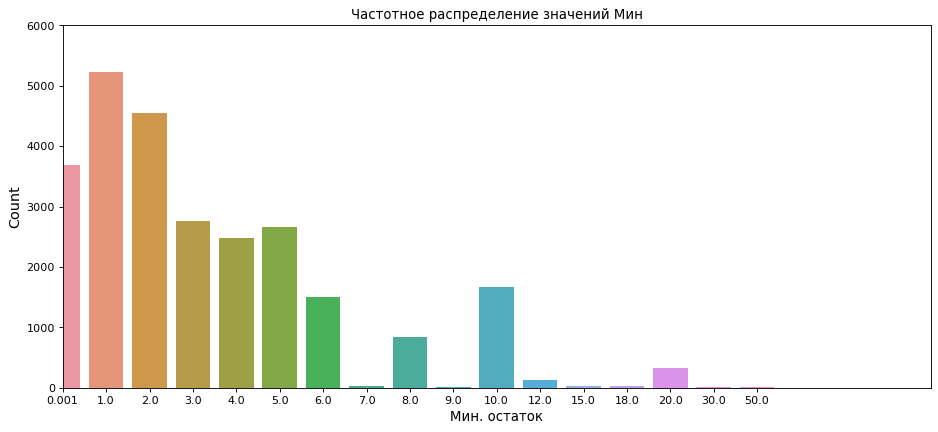

In [28]:
from matplotlib.pyplot import figure

fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='МинимальныйСтраховойЗапас', data=y_filter)
plt.title('Частотное распределение значений Мин')
plt.xlabel('Мин. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
plt.axis([0, 20, 0, 6000])
plt.show()


#fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
#sns.countplot(x='МинимальныйСтраховойЗапас', data=y_filter)
#plt.xlabel('Мин. остаток', fontsize=12)
#plt.ylabel('Count', fontsize=13)
#plt.axis([21, 35, 0, 6000])
#plt.show()

In [29]:
print(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts())
qual_min = len(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts()) # для метрик вводим переменную
print(qual_min)
print(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts().sum())

1.000     5230
2.000     4552
0.001     3695
3.000     2763
5.000     2657
4.000     2479
10.000    1667
6.000     1499
8.000      840
20.000     320
12.000     131
7.000       28
18.000      23
15.000      22
50.000      21
30.000      12
9.000       11
Name: МинимальныйСтраховойЗапас, dtype: int64
17
25950


In [30]:
qual_min

17

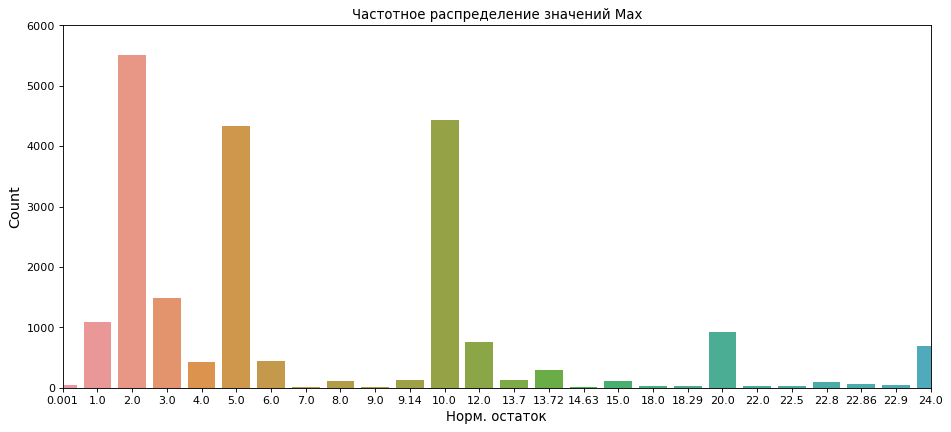

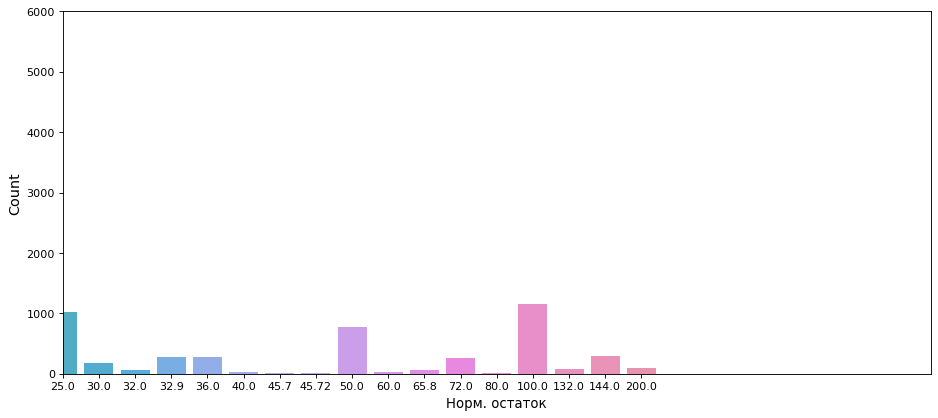

In [31]:
# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='ЗначениеТочкиЗаказа', data=y_filter)
# plt.axis([0.0, 70])
plt.title('Частотное распределение значений Мах')
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#ax.set(xlim=(0, 300))
plt.axis([0.0, 25, 0, 6000])
#ax.set_xticklabels(range(0,50))
plt.show()


# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='ЗначениеТочкиЗаказа', data=y_filter)
# plt.axis([0.0, 70])
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#plt.xticks(y_filter.loc[:, 'Нормативный остаток'])
#ax.set(xlim=(0, 100))
plt.axis([26, 50, 0, 6000])
# ax.set_xticklabels(range(0,50))
plt.show()


In [32]:
print(y_filter.loc[:, 'ЗначениеТочкиЗаказа'].value_counts().head(60))
qual_max = len(y_filter.loc[:, 'ЗначениеТочкиЗаказа'].value_counts()) # для метрик вводим переменную
print(qual_max)

2.000      5502
10.000     4427
5.000      4327
3.000      1492
100.000    1155
1.000      1096
25.000     1016
20.000      930
50.000      782
12.000      756
24.000      695
6.000       442
4.000       423
13.720      296
144.000     290
32.900      286
36.000      273
72.000      259
30.000      184
13.700      135
9.140       130
15.000      111
8.000       108
22.800      100
200.000      96
132.000      79
32.000       67
65.800       63
22.860       59
22.900       54
0.001        44
40.000       34
22.500       34
22.000       28
60.000       28
18.290       26
18.000       24
7.000        21
9.000        19
45.720       19
14.630       17
45.700       13
80.000       10
Name: ЗначениеТочкиЗаказа, dtype: int64
43


#### Создаем Pipeline

In [191]:
le_min = LabelEncoder()  #Делаем label encoding
le_max = LabelEncoder()

y_filter_min_le = le_min.fit_transform(y_filter_min)
y_filter_max_le = le_max.fit_transform(y_filter_max)

In [34]:
len(y_filter_min_le)

25950

In [35]:
# Начнем трансформировать колонки, в зависимости от типа значений:
categorical_features = X_filter.select_dtypes(include=[object])

In [36]:
categorical_features = categorical_features.drop(['Номенклатура'], axis=1) # ненужно для обучения
categorical_features[categorical_features['КатегорияТовараАйриса'] == "A"]

ГруппаНоменклатуры ЕдиницаИзмерения СтатусТовараАйриса КатегорияТовара  \
42                Разное               шт         Регулярный               A   
44                Разное               шт         Регулярный               A   
49                Разное       упак (4шт)            Фасовка               B   
50                Разное               шт         Регулярный               A   
337                 Prym              пар         Регулярный               A   
...                  ...              ...                ...             ...   
51169              Цепи                 м         Регулярный               A   
51170              Цепи                 м         Регулярный               A   
51171              Цепи                 м         Регулярный               A   
51172              Цепи                 м         Регулярный               A   
51174              Цепи                 м         Регулярный               A   

      КатегорияТовараАйриса                            ОсновнойПоставщик  
42                        A            Лукьянова Ольга Александровна(ИП)  
44                        A            Лукьянова Ольга Александровна(ИП)  
49                        A            Лукьянова Ольга Александровна(ИП)  
50                        A            Лукьянова Ольга Александровна(ИП)  
337                       A  Prym Consumer Europe GmbH - ПРИМ (Германия)  
...                     ...                                          ...  
51169                     A                            Китай LG industry  
51170                     A                            Китай LG industry  
51171                     A                            Китай LG industry  
51172                     A                               Китай Yuantong  
51174                     A                               Китай Yuantong  

[4111 rows x 6 columns]

In [37]:
numerical_features = X_filter.select_dtypes(include=[np.number])

In [38]:
numerical_features = numerical_features.drop(['НомерСтроки', 'Артикул', 'КодХарактеристики'], axis=1) # ненужно для обучения
numerical_features

ОптоваяФасовкаАйрис  КоэффициентЕдиницы  СредниеПродажи   Цена  \
9                      1.0                 1.0           0.078   65.0   
10                     1.0                 1.0           0.684   93.0   
11                     1.0                 1.0           0.415   99.0   
12                     1.0                 1.0           0.672  118.0   
13                     1.0                 1.0           0.529   75.0   
...                    ...                 ...             ...    ...   
51172                 10.0                10.0           0.795  195.0   
51173                 10.0                10.0           0.000  120.0   
51174                 10.0                10.0           1.470  282.0   
51175                 10.0                10.0           0.271  437.0   
51177                  5.0                 1.0           0.333  260.0   

       ПроданоВсего  КоличествоСделок  КоличествоПериодовПродаж  \
9             1.000                 1                         1   
10            8.821                 9                         6   
11            2.493                 2                         2   
12            8.665                 6                         6   
13            6.827                 4                         4   
...             ...               ...                       ...   
51172        10.254                 7                         5   
51173         0.000                 0                         0   
51174        18.965                19                         8   
51175         3.490                 5                         4   
51177         2.000                 1                         1   

       КоличествоДнейНаСкладе  ЗакупкаЗаПериод  ЗакупочнаяЦена  
9                         366            48.00           19.60  
10                        360            66.00           30.87  
11                        162            38.00           33.12  
12                        327            66.00           41.00  
13                        366            20.00           21.00  
...                       ...              ...             ...  
51172                     366           302.53           38.50  
51173                       0            13.49           66.00  
51174                     366           207.26           55.87  
51175                     366            64.93          220.00  
51177                     151             1.00          148.53  

[25950 rows x 10 columns]

In [39]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25950 entries, 9 to 51177
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ОптоваяФасовкаАйрис       25950 non-null  float64
 1   КоэффициентЕдиницы        25950 non-null  float64
 2   СредниеПродажи            25950 non-null  float64
 3   Цена                      25950 non-null  float64
 4   ПроданоВсего              25950 non-null  float64
 5   КоличествоСделок          25950 non-null  int64  
 6   КоличествоПериодовПродаж  25950 non-null  int64  
 7   КоличествоДнейНаСкладе    25950 non-null  int64  
 8   ЗакупкаЗаПериод           25950 non-null  float64
 9   ЗакупочнаяЦена            25950 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.2 MB


In [40]:
len(y_filter_min_le)

25950

In [41]:
# будем вставлять 0
numerical_features_1 = numerical_features[
    ['СредниеПродажи', 'ПроданоВсего','КоличествоСделок', 'КоличествоПериодовПродаж', 'ЗакупкаЗаПериод']
]         
numerical_features_2 = numerical_features.drop(numerical_features_1.columns, axis=1)


In [42]:
# здесь устанавливаем, что заполняем нулями отсутствующ. значения
imp_const = SimpleImputer(missing_values=np.nan, strategy='constant')

In [43]:
# указываем колонки для трансформации (общие и для мин и для мах):
numerical_features_1_col = numerical_features_1.columns  # будем вставлять 0 и производить PolynomialFeatures
numerical_features_2_col = numerical_features_2.columns  # будем только производить PolynomialFeatures
categorical_features_col = categorical_features.columns  # будем производить OHE

# указываем какой препроцессинг будем делать на разных колонках (параметры скалирования зададим непосредств.в grid_search):
numerical_transformer_1 = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
numerical_transformer_2 = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
categorical_transformer = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('ОНЕ', OneHotEncoder(sparse=False, handle_unknown='ignore'))
        ]
)

# создаем общий трансформатор:
data_transformer_1 = ColumnTransformer(
    transformers=[
        ('numerical_1', numerical_transformer_1, numerical_features_1_col),
        ('numerical_2', numerical_transformer_2, numerical_features_2_col),
        ('categorical', categorical_transformer, categorical_features_col)])

data_transformer_2 = ColumnTransformer(
    transformers=[
        ('numerical_1', numerical_transformer_1, numerical_features_1_col),
        ('numerical_2', numerical_transformer_2, numerical_features_2_col),
        ('categorical', categorical_transformer, categorical_features_col)])

In [44]:
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(
    X_filter, y_filter_min_le, test_size=0.33, stratify=y_filter_min_le, random_state=42
)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(
    X_filter, y_filter_max_le, test_size=0.33, stratify=y_filter_max_le, random_state=42
)

#### Здесь остановился 08.02.2021

In [45]:
X_train_min_trans = data_transformer_1.fit_transform(X_train_min) # далее обрабатываем трансформированные значения!!
X_train_max_trans = data_transformer_2.fit_transform(X_train_max)

In [46]:
len(X_train_max_trans[1])

1033

### балансировку делать после расщепления и только для тренировочных данных!!!:

In [47]:
#len(X_filter_trans)

In [48]:
len(y_filter_min_le)

25950

### Наконец то подошли к классификации!!

In [49]:
# 1. обратить внимание на балансировку внутри эстиматора....нужна ли она?
# 2. стандартизация нужна ли для деревьев и леса...и какая? (вроде для деревьев не нужна стандартизация) -УБРАЛ
# 3. Сейчас включен рандом форест на 5ой b 6ой версии))

In [50]:
# RandomForestClassifier
en_RF = Pipeline(
    steps=[('ros', RandomOverSampler(random_state=0)),
           ('RF', RandomForestClassifier(random_state=42, class_weight='balanced'))
          ]
)

In [51]:
# Создаем сетку поиска для RandomForestClassifier:
param_grid_rf = {
    'RF__criterion':['gini','entropy'],
    'RF__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
    #'RF__criterion':['gini'],
    #'RF__max_depth':[30,40,50,70]
}

In [52]:
grid_search_min = GridSearchCV(en_RF, param_grid=param_grid_rf)
grid_search_max = GridSearchCV(en_RF, param_grid=param_grid_rf)

In [53]:
grid_min = grid_search_min.fit(X_train_min_trans, y_train_min)

In [54]:
grid_min.best_params_

{'RF__criterion': 'gini', 'RF__max_depth': 90}

In [55]:
grid_max = grid_search_max.fit(X_train_max_trans, y_train_max)

In [56]:
grid_max.best_params_

{'RF__criterion': 'gini', 'RF__max_depth': 70}

In [57]:
# now we  save it to a file:     (закомитил, чтоб случайно не затереть)

#with open('min_name.pkl', 'wb') as f:
    #pickle.dump(grid_min, f)
    
#with open('max_name.pkl', 'wb') as f:
    #pickle.dump(grid_max, f)    

In [58]:
# and we can load it:

with open('min_name.pkl', 'rb') as f:
    grid_min_s = pickle.load(f)
    
with open('max_name.pkl', 'rb') as f:
    grid_max_s = pickle.load(f)

In [59]:
X_test_min_trans = data_transformer_1.transform(X_test_min)
X_test_max_trans = data_transformer_2.transform(X_test_max)

In [60]:
print(grid_min_s.score(X_train_min_trans, y_train_min))
print(grid_max_s.score(X_train_max_trans, y_train_max))

1.0
0.9999424824571495


In [61]:
# 28.01.2021 Как вариант:сохранять рассчитанные параметры в течение мес для каждого магазина, а обновлять мин-макс 1 раз в неделю

In [65]:
pred_min = grid_min.predict(X_test_min_trans)
pred_max = grid_max.predict(X_test_max_trans)

In [66]:
# НЕ ЗАБЫТЬ СДЕЛАТЬ ОБРАТНОЕ ПРЕОБРАЗОВАН на  ЛЭЙБЛ!!!!(обратное рпеобразование делать после всех метрик, 
# иначе будет выдавать ошибку: continuous is not supported)

In [220]:
X_test_min

НомерСтроки  Артикул  КодХарактеристики  \
49272        49273  7715386                 13   
11547        11548    15370                  6   
45958        45959  7729029                  3   
16407        16408   508855               <NA>   
30791        30792   694900                  2   
...            ...      ...                ...   
10969        10970   499004               <NA>   
40614        40615   500551                  8   
1058          1059   675288                 93   
44208        44209  7709567                  1   
35314        35315  7727583                 11   

                              ГруппаНоменклатуры  \
49272        Крючки, застежки, вешалки Hobby&Pro   
11547                        Молнии декоративные   
45958                           Манжеты, подвязы   
16407                           Бумага глянцевая   
30791  Цветы, листья (бумажные, скелетированные)   
...                                          ...   
10969                                    Контэнт   
40614                              Шнуры кож/зам   
1058                                 Бисер Астра   
44208                                      Астра   
35314                         Кружево эластичное   

                                            Номенклатура ЕдиницаИзмерения  \
49272           88-001 Крючок шубный Hobby&Pro 5 шт/упак             упак   
11547        Молния "витая" Т6 - 70см (ST6ВM-483) Arta-F               шт   
45958  3AR1192 Воротник трикотажный однотонный (98% п...               шт   
16407  4036200 Бумага глянцевая в рулоне «Цветы», 0,6...               шт   
30791  SCB3008 Набор цветков из шелковичной бумаги, 2...             упак   
...                                                  ...              ...   
10969  Книга. Комплекты для малышей. Вяжем спицами (С...               шт   
40614              ГУ11262 Шнур плетеный кожзам 3мм*100м                м   
1058                              Бисер Астра  11/0, 20г             упак   
44208                      Концевик LH001-B, 4mm, 5шт/уп             упак   
35314               3AR364 Кружево эластичное 16см*9,14м                м   

       ОптоваяФасовкаАйрис  КоэффициентЕдиницы  СредниеПродажи   Цена  \
49272                 1.00                 1.0           0.436  266.0   
11547                 1.00                 1.0           0.082  166.0   
45958                 1.00                 1.0           0.000  144.0   
16407                 1.00                 1.0           0.000  401.0   
30791                 1.00                 1.0           0.000   68.0   
...                    ...                 ...             ...    ...   
10969                 1.00                 1.0           0.000  365.0   
40614               100.00                 1.0           0.766  105.0   
1058                 10.00                 1.0           1.705   35.0   
44208                 1.00                 1.0           0.837   12.0   
35314                 9.14                 1.0           0.518  113.0   

       ПроданоВсего  КоличествоСделок  КоличествоПериодовПродаж  \
49272         5.625                 6                         4   
11547         1.053                 1                         1   
45958         0.000                 0                         0   
16407         0.000                 0                         0   
30791         0.000                 0                         0   
...             ...               ...                       ...   
10969         0.000                 0                         0   
40614         9.881                 5                         3   
1058         22.000                19                         8   
44208        10.795                 9                         7   
35314         6.677                 3                         3   

       КоличествоДнейНаСкладе  ЗакупкаЗаПериод СтатусТовараАйриса  \
49272                     366            97.00            Фасовка   
11547                     366       

In [151]:
frame_min = [
    pd.DataFrame(pred_min, columns=['predict']), 
    pd.DataFrame(y_test_min, columns=['Минимальный остаток']).reset_index(drop=True), X_test_min[['ОптоваяФасовкаАйрис']].reset_index(drop=True)
]
frame_max = [
    pd.DataFrame(pred_max, columns=['predict']), 
    pd.DataFrame(y_test_max, columns=['Нормативный остаток']).reset_index(drop=True), X_test_max['ОптоваяФасовкаАйрис'].reset_index(drop=True)
]


In [152]:
df3_min = pd.concat(frame_min, axis=1)
df3_max = pd.concat(frame_max, axis=1)

#### Здесь остановился 09.02.2021

In [173]:
df3_min[df3_min['Минимальный остаток']==20] #быстрая оценка признаков

Empty DataFrame
Columns: [predict, Минимальный остаток, ОптоваяФасовкаАйрис, predict_inv, Минимальный остаток_inv]
Index: []

In [154]:
IPython.display.HTML(df3_min.to_html())

In [155]:
IPython.display.HTML(df3_max.to_html())

#### Посмотрим на метрики на тестовых данных: (не забываем, что у нас закодированные значения!!)

In [120]:
accuracy_score(df3_min['Минимальный остаток'], df3_min['predict'])

0.8194768799626343

In [121]:
accuracy_score(df3_max['Нормативный остаток'], df3_max['predict'])

0.9020317608594115

In [122]:
precision_min, recall_min, fscore_min, support_min = score(df3_min['Минимальный остаток'], df3_min["predict"])
precision_macro_min, recall_macro_min, fscore_macro_min, support_macro_min = score(df3_min['Минимальный остаток'], df3_min["predict"], average='macro')
precision_micro_min, recall_micro_min, fscore_micro_min, support_micro_min = score(df3_min['Минимальный остаток'], df3_min["predict"], average='micro')



C:\Users\a.mochalov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
# Проверка на отсутствие какого-либо класса в ПРЕДСКАЗАНИЯХ!! (именно в предсказаниях!!!)
set(df3_min['Минимальный остаток']) - set(df3_min["predict"])

{9}

In [127]:
precision_max, recall_max, fscore_max, support_max = score(df3_max['Нормативный остаток'], df3_max["predict"])
precision_macro_max, recall_macro_max, fscore_macro_max, support_macro_max = score(df3_max['Нормативный остаток'], df3_max["predict"], average='macro')
precision_micro_max, recall_micro_max, fscore_micro_max, support_micro_max = score(df3_max['Нормативный остаток'], df3_max["predict"], average='micro')

In [128]:
score_precision_min = pd.DataFrame((precision_min.reshape(qual_min, 1)), columns=['precision_min'])
score_recall_min = pd.DataFrame((recall_min.reshape(qual_min, 1)), columns=['recall_min'])
score_fscore_min = pd.DataFrame((fscore_min.reshape(qual_min, 1)), columns=['fscore_min'])
score_support_min = pd.DataFrame((support_min.reshape(qual_min, 1)), columns=['support_min'])
for_frame_min = [score_precision_min, score_recall_min, score_fscore_min, score_support_min] 
score_all_min = pd.concat(for_frame_min, axis=1)
score_all_min

precision_min  recall_min  fscore_min  support_min
0        0.833986    0.873667    0.853365         1219
1        0.794559    0.829085    0.811454         1726
2        0.810249    0.778961    0.794297         1502
3        0.856799    0.780702    0.816982          912
4        0.836709    0.808068    0.822139          818
5        0.851685    0.864310    0.857951          877
6        0.806641    0.834343    0.820258          495
7        0.500000    0.111111    0.181818            9
8        0.825581    0.768953    0.796262          277
9        0.000000    0.000000    0.000000            4
10       0.774760    0.881818    0.824830          550
11       0.962963    0.604651    0.742857           43
12       0.272727    0.428571    0.333333            7
13       1.000000    0.500000    0.666667            8
14       0.817073    0.632075    0.712766          106
15       1.000000    0.750000    0.857143            4
16       1.000000    0.857143    0.923077            7

In [129]:
score_precision_max = pd.DataFrame((precision_max.reshape(qual_max, 1)), columns=['precision_max'])
score_recall_max = pd.DataFrame((recall_max.reshape(qual_max, 1)), columns=['recall_max'])
score_fscore_max = pd.DataFrame((fscore_max.reshape(qual_max, 1)), columns=['fscore_max'])
score_support_max = pd.DataFrame((support_max.reshape(qual_max, 1)), columns=['support_max'])
for_frame_max = [score_precision_max, score_recall_max, score_fscore_max, score_support_max] 
score_all_max = pd.concat(for_frame_max, axis=1)
score_all_max

precision_max  recall_max  fscore_max  support_max
0        0.750000    0.600000    0.666667           15
1        0.812121    0.740331    0.774566          362
2        0.845723    0.914648    0.878836         1816
3        0.707724    0.689024    0.698249          492
4        0.798165    0.621429    0.698795          140
5        0.924701    0.920168    0.922429         1428
6        0.948529    0.883562    0.914894          146
7        0.400000    0.285714    0.333333            7
8        0.826087    0.527778    0.644068           36
9        0.833333    0.833333    0.833333            6
10       0.977273    1.000000    0.988506           43
11       0.952479    0.946612    0.949537         1461
12       0.974576    0.923695    0.948454          249
13       1.000000    0.933333    0.965517           45
14       0.959596    0.969388    0.964467           98
15       1.000000    1.000000    1.000000            6
16       1.000000    0.783784    0.878788           37
17       1.000000    0.875000    0.933333            8
18       1.000000    1.000000    1.000000            9
19       0.938776    0.899023    0.918469          307
20       1.000000    0.888889    0.941176            9
21       1.000000    0.909091    0.952381           11
22       0.914286    0.969697    0.941176           33
23       1.000000    0.894737    0.944444           19
24       0.937500    0.833333    0.882353           18
25       0.974026    0.982533    0.978261          229
26       0.948127    0.982090    0.964809          335
27       1.000000    0.868852    0.929825           61
28       1.000000    1.000000    1.000000           22
29       1.000000    1.000000    1.000000           94
30       0.987952    0.911111    0.947977           90
31       0.857143    0.545455    0.666667           11
32       1.000000    1.000000    1.000000            4
33       1.000000    0.666667    0.800000            6
34       0.929368    0.968992    0.948767          258
35       1.000000    0.666667    0.800000            9
36       1.000000    0.857143    0.923077           21
37       1.000000    0.964706    0.982036           85
38       1.000000    1.000000    1.000000            3
39       0.908434    0.989501    0.947236          381
40       1.000000    0.961538    0.980392           26
41       0.989247    0.958333    0.973545           96
42       0.947368    0.562500    0.705882           32

In [130]:
print(f'precision_macro_min={precision_macro_min}, recall_macro_min={recall_macro_min},\
 score_macro_min={fscore_macro_min}, support_macro_min={support_macro_min}')

precision_macro_min=0.7613960524700004, recall_macro_min=0.6649094112896183, score_macro_min=0.6950118204743385, support_macro_min=None


In [131]:
print(f'precision_macro_max={precision_macro_max}, recall_macro_max={recall_macro_max},\
 score_macro_max={fscore_macro_max}, support_macro_max={support_macro_max}')

precision_macro_max=0.931221741042948, recall_macro_max=0.8541547974600442, score_macro_max=0.88656385770208, support_macro_max=None


In [132]:
print(f'precision_micro_min={precision_micro_min}, recall_micro_min={recall_micro_min},\
 score_micro_min={fscore_micro_min}, support_micro_min={support_micro_min}')

precision_micro_min=0.8194768799626343, recall_micro_min=0.8194768799626343, score_micro_min=0.8194768799626343, support_micro_min=None


In [133]:
print(f'precision_micro_max={precision_micro_max}, recall_micro_max={recall_micro_max},\
 score_micro_max={fscore_micro_max}, support_micro_max={support_micro_max}')

precision_micro_max=0.9020317608594115, recall_micro_max=0.9020317608594115, score_micro_max=0.9020317608594115, support_micro_max=None


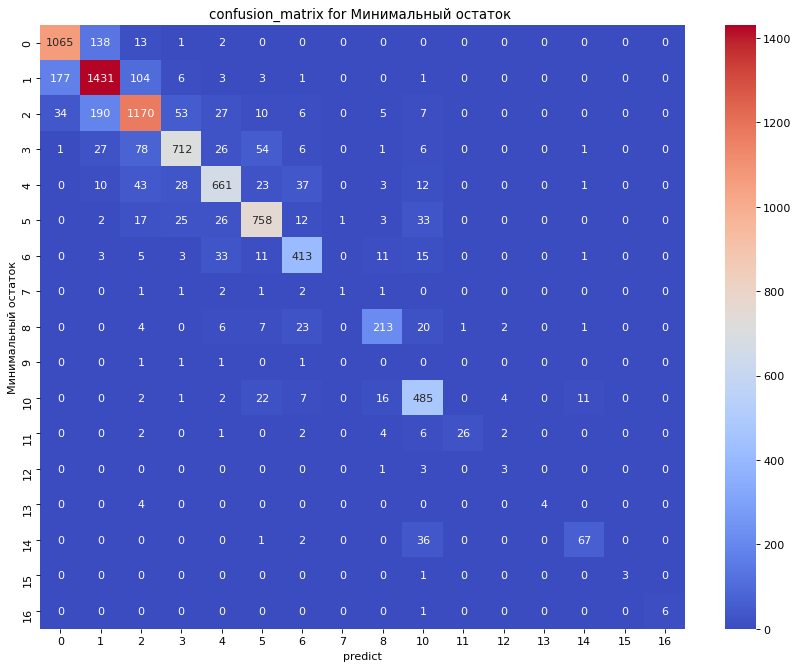

In [135]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_min['Минимальный остаток'], df3_min["predict"],
                               rownames=['Минимальный остаток'], colnames=["predict"])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Минимальный остаток ')
plt.show()

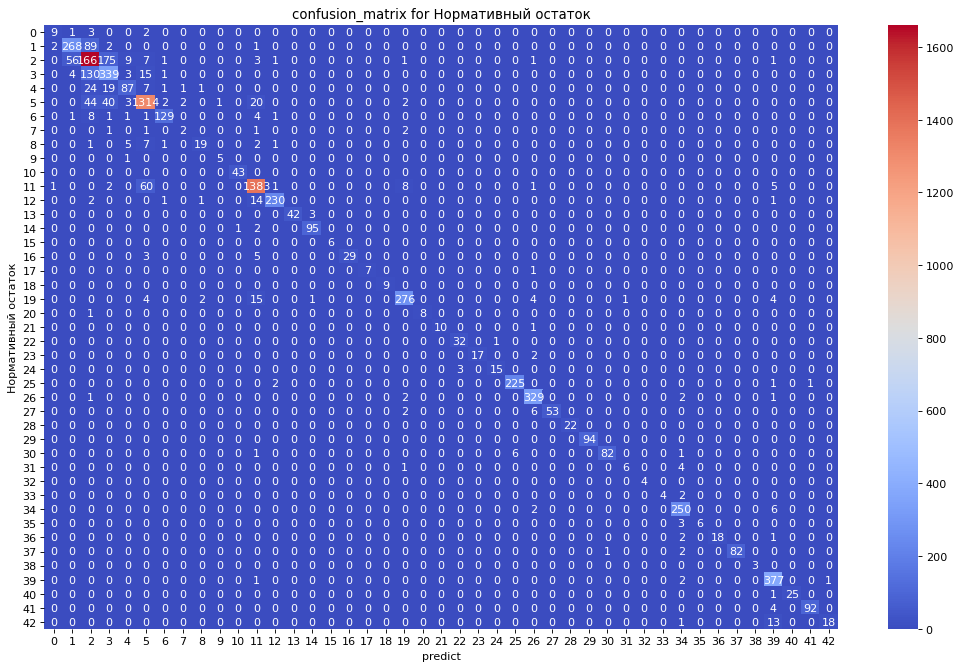

In [142]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_max['Нормативный остаток'], df3_max["predict"],
                               rownames=['Нормативный остаток'], colnames=["predict"])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Нормативный остаток')
plt.show()

In [219]:
confusion_matrix

predict              0    1     2    3   4     5    6   7   8   9   ...  33  \
Нормативный остаток                                                 ...       
0                     9    1     3    0   0     2    0   0   0   0  ...   0   
1                     2  268    89    2   0     0    0   0   0   0  ...   0   
2                     0   56  1661   75   9     7    1   0   0   0  ...   0   
3                     0    4   130  339   3    15    1   0   0   0  ...   0   
4                     0    0    24   19  87     7    1   1   1   0  ...   0   
5                     0    0    44   40   3  1314    2   2   0   1  ...   0   
6                     0    1     8    1   1     1  129   0   0   0  ...   0   
7                     0    0     0    1   0     1    0   2   0   0  ...   0   
8                     0    0     1    0   5     7    1   0  19   0  ...   0   
9                     0    0     0    0   1     0    0   0   0   5  ...   0   
10                    0    0     0    0   0     0    0   0   0   0  ...   0   
11                    1    0     0    2   0    60    0   0   0   0  ...   0   
12                    0    0     2    0   0     0    1   0   1   0  ...   0   
13                    0    0     0    0   0     0    0   0   0   0  ...   0   
14                    0    0     0    0   0     0    0   0   0   0  ...   0   
15                    0    0     0    0   0     0    0   0   0   0  ...   0   
16                    0    0     0    0   0     3    0   0   0   0  ...   0   
17                    0    0     0    0   0     0    0   0   0   0  ...   0   
18                    0    0     0    0   0     0    0   0   0   0  ...   0   
19                    0    0     0    0   0     4    0   0   2   0  ...   0   
20                    0    0     1    0   0     0    0   0   0   0  ...   0   
21                    0    0     0    0   0     0    0   0   0   0  ...   0   
22                    0    0     0    0   0     0    0   0   0   0  ...   0   
23                    0    0     0    0   0     0    0   0   0   0  ...   0   
24                    0    0     0    0   0     0    0   0   0   0  ...   0   
25                    0    0     0    0   0     0    0   0   0   0  ...   0   
26                    0    0     1    0   0     0    0   0   0   0  ...   0   
27                    0    0     0    0   0     0    0   0   0   0  ...   0   
28                    0    0     0    0   0     0    0   0   0   0  ...   0   
29                    0    0     0    0   0     0    0   0   0   0  ...   0   
30                    0    0     0    0   0     0    0   0   0   0  ...   0   
31                    0    0     0    0   0     0    0   0   0   0  ...   0   
32                    0    0     0    0   0     0    0   0   0   0  ...   0   
33                    0    0     0    0   0     0    0   0   0   0  ...   4   
34                    0    0     0    0   0     0    0   0   0   0  ...   0   
35                    0    0     0    0   0     0    0   0   0   0  ...   0   
36                    0    0     0    0   0     0    0   0   0   0  ...   0   
37                    0    0     0    0   0     0    0   0   0   0  ...   0   
38                    0    0     0    0   0     0    0   0   0   0  ...   0   
39                    0    0     0    0   0     0    0   0   0   0  ...   0   
40                    0    0     0    0   0     0    0   0   0   0  ...   0   
41                    0    0     0    0   0     0    0   0   0   0  ...   0   
42                    0    0     0    0   0     0    0   0   0   0  ...   0   

predict               34  35  36  37  38   39  40  41  42  
Нормативный остаток                                        
0                      0   0   0   0   0    0   0   0   0  
1                      0   0   0   0   0    0   0   0   0  
2                      0   0   0   0   0    1   0   0   0  
3                      0   0   0   0   0    0   0   0   0  
4                      0   0   0   0   0    0   0   0   0  
5                      0

#### Подготовка к заливке на общий ресурс

In [182]:
df3_min['predict_inv'] = le_min.inverse_transform(df3_min.predict)
df3_max['predict_inv'] = le_max.inverse_transform(df3_max.predict)

df3_min['Минимальный остаток_inv'] = le_min.inverse_transform(df3_min['Минимальный остаток'])
df3_max['Нормативный остаток_inv'] = le_max.inverse_transform(df3_max['Нормативный остаток'])

df3_min['prophet'] = df3_min['predict_inv'] 
df3_max['prophet'] = df3_max[['predict_inv', 'ОптоваяФасовкаАйрис']].max(axis=1)

In [194]:
df3_min[['Минимальный остаток_inv', 'ОптоваяФасовкаАйрис', 'predict_inv', 'prophet']]

Минимальный остаток_inv  ОптоваяФасовкаАйрис  predict_inv  prophet
0                       2.000                 1.00        1.000    1.000
1                       1.000                 1.00        1.000    1.000
2                       1.000                 1.00        1.000    1.000
3                       1.000                 1.00        0.001    0.001
4                       1.000                 1.00        0.001    0.001
...                       ...                  ...          ...      ...
8559                    0.001                 1.00        0.001    0.001
8560                    5.000               100.00        5.000    5.000
8561                    5.000                10.00        5.000    5.000
8562                    2.000                 1.00        2.000    2.000
8563                    2.000                 9.14        2.000    2.000

[8564 rows x 4 columns]

In [218]:
df3_max[['Нормативный остаток_inv', 'ОптоваяФасовкаАйрис', 'predict_inv', 'prophet']]

Нормативный остаток_inv  ОптоваяФасовкаАйрис  predict_inv  prophet
0                        12.0                 12.0         12.0     12.0
1                        10.0                 10.0         10.0     10.0
2                         4.0                  1.0          4.0      4.0
3                        20.0                 20.0         20.0     20.0
4                         3.0                  1.0          2.0      2.0
...                       ...                  ...          ...      ...
8559                    100.0                100.0        100.0    100.0
8560                      2.0                  1.0          2.0      2.0
8561                     36.0                 36.0         36.0     36.0
8562                      2.0                  1.0          2.0      2.0
8563                      2.0                  1.0          2.0      2.0

[8564 rows x 4 columns]

#### Здесь остановился 10.02.2021

In [222]:
# файл заливки:
X_need_min_trans = data_transformer_1.transform(X_need)
X_need_max_trans = data_transformer_2.transform(X_need)


In [240]:
y_pred_need_min = grid_min.predict(X_need_min_trans)
y_pred_need_max = grid_max.predict(X_need_max_trans)

In [275]:
frame_min_need = [pd.DataFrame(y_pred_need_min, columns=['predict']),
                  pd.DataFrame(X_need[['ОптоваяФасовкаАйрис', 'Артикул', 'КодХарактеристики']].reset_index(drop=True))]
frame_max_need = [pd.DataFrame(y_pred_need_max, columns=['predict']),
                  pd.DataFrame(X_need['ОптоваяФасовкаАйрис'].reset_index(drop=True))]

In [276]:
df4_min = pd.concat(frame_min_need, axis=1)
df4_max = pd.concat(frame_max_need, axis=1)

In [277]:
df4_min['predict_inv_min'] = le_min.inverse_transform(df4_min.predict)
df4_max['predict_inv_max'] = le_max.inverse_transform(df4_max.predict)


In [278]:
df4_min

predict  ОптоваяФасовкаАйрис  Артикул  КодХарактеристики  \
0            0                 1.00   612807               <NA>   
1           10               300.00   167002               <NA>   
2           10               150.00   167010               <NA>   
3           10               100.00   167012               <NA>   
4           10               150.00   167009               <NA>   
...        ...                  ...      ...                ...   
23214        0                 1.00  7722329               <NA>   
23215        0                 1.00  7724610               <NA>   
23216        3                27.42  7724860                  8   
23217        0                 1.00   501484               <NA>   
23218        1                 1.00  7700029                  1   

       predict_inv_min  
0                0.001  
1               10.000  
2               10.000  
3               10.000  
4               10.000  
...                ...  
23214            0.001  
23215            0.001  
23216            3.000  
23217            0.001  
23218            1.000  

[23219 rows x 5 columns]

In [279]:
df4_max

predict  ОптоваяФасовкаАйрис  predict_inv_max
0            2                 1.00              2.0
1           25               300.00             24.0
2           39               150.00            100.0
3           39               100.00            100.0
4           39               150.00            100.0
...        ...                  ...              ...
23214        1                 1.00              1.0
23215        2                 1.00              2.0
23216       26                27.42             25.0
23217        2                 1.00              2.0
23218        2                 1.00              2.0

[23219 rows x 3 columns]

In [300]:
df5_all = pd.concat([df4_min[['ОптоваяФасовкаАйрис', 'Артикул', 'КодХарактеристики', 'predict_inv_min']] ,
                     df4_max['predict_inv_max']], axis=1)

In [301]:
df5_all['prophet_predict_inv_max'] = df5_all[['predict_inv_max', 'ОптоваяФасовкаАйрис']].max(axis=1)

In [302]:
#df5_all.drop(['predict_inv_max'], inplace=True, axis=1)

In [303]:
IPython.display.HTML(df5_all.to_html())

In [304]:
df5_all.to_excel("df5_all_excel.xlsx") 

#### Сама заливка

In [286]:
df5_all.to_csv('df5_all.csv', sep=';')

In [287]:
ftp = FTP('192.168.50.48')
ftp.login('A.Mochalov','Fktrcfylh1!40')
#encoding = 'cp1251'

'230 User ISK\\a.mochalov logged in.'

In [288]:
ftp.cwd('/IT_obmen/Mochalov') 

'250 CWD command successful.'

In [290]:
file_name = 'df5_all.csv'  

In [291]:
with open(file_name, 'rb') as fobj:
            ftp.storbinary('STOR ' + file_name, fobj)

### Комментарии:

In [ ]:
# ОТФИЛЬТРОВАТЬ СТАТУСЫ МАРКЕТ ПЛЕЙС (НАШ), ИСКЛЮЧЕННЫЙ (АЙРИС) ??????????

In [ ]:
#df3_min['prophet'] = df3_min['predict']    # 'это только для МИНИМАЛЬНОГО остатка !!!'
# df3_max['prophet'] = df3_max[['predict', 'Фасовка айрис']].max(axis=1)    # 'это только для НОРМАТИВНОГО остатка !!!'
#df3_max['prophet'] = df3_max['predict'] # т.к. было преобразование в label!!!! (иначе бы использовали строку выше)

In [ ]:
# ЧТОЬ НЕ ЗАБЫТЬ:

## xgb_clf почитать о ней


# КАК ВАРИАНТ-ИСПОЛЬЗОВАТЬ МИН(МАКС) ИЛИ МАКС(МИН) КАК ЕЩЕ ОДИН ПРИЗНАК ДЛЯ РАССЧЕТА МАКС(МИН) ИЛИ МИН(МАКС)!!!!!!

In [ ]:
# 1. Поработать с дисбалансом до testsplit (чтоб заработала стратификация)
# 2. Поигарть с метриками как в папке  MIN-MAX
# 3. Советуют попробовать так же MSE метрику (настойчиво советуют)
# 4. Добавить колонку  минимальный остаток, чтоб понимать по каким мин у нас проваливаются метрики
# 5. Может сравнение все же делать с данными без балансировки??

In [ ]:
##rfmSegmentation.to_csv('rfm-table_mark.csv', sep=';')

In [139]:
### неплохая задумка:
### metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))